# Data Cleaning

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, plot_confusion_matrix,
                             plot_roc_curve, precision_score, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

%matplotlib inline


# warnings.filterwarnings("ignore")
np.random.seed(123)
import warnings
warnings.filterwarnings('ignore')

In [66]:
df_start = pd.read_csv('unicorns.csv')

In [67]:
df_start

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.00,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.00,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.00,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.00,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.00,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1194,"10/31/2022, 2:32:42 AM",Fanatics,https://www.cbinsights.com/company/fanatics,27.00,6/6/2012,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[""SoftBank Group"",""Andreessen Horowitz"",""Temas...",NaN
1195,"10/31/2022, 2:32:38 AM",SpaceX,https://www.cbinsights.com/company/space-explo...,127.00,12/1/2012,2012,Hawthorne,United States,Other,"[""Founders Fund"",""Draper Fisher Jurvetson"",""Ro...",NaN
1196,"10/31/2022, 2:33:10 AM",Vice Media,https://www.cbinsights.com/company/vice-media,5.70,4/2/2011,2011,Brooklyn,United States,Internet software & services,"[""Technology Crossover Ventures"",""A&E Televisi...",NaN
1197,"10/31/2022, 2:33:05 AM",Klarna,https://www.cbinsights.com/company/klarna,6.70,12/12/2011,2011,Stockholm,Sweden,Fintech,"[""Institutional Venture Partners"",""Sequoia Cap...",NaN


In [68]:
#changing column names for ease
df_start = df_start.rename(columns={'Updated at': 'updated_at',
                                'Company': 'company', 
                                'Crunchbase Url': 'crunchbase_url',
                                'Last Valuation (Billion $)': 'last_val', 
                                'Date Joined': 'date_joined',
                                'Year Joined': 'year_joined',
                                'City': 'city',
                                'Country': 'country',
                                'Industry': 'industry',
                                'Investors': 'investors',
                                'Company Website': 'company_website'
                                
                                })


In [69]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   updated_at       1199 non-null   object 
 1   company          1199 non-null   object 
 2   crunchbase_url   1199 non-null   object 
 3   last_val         1199 non-null   float64
 4   date_joined      1199 non-null   object 
 5   year_joined      1199 non-null   int64  
 6   city             1181 non-null   object 
 7   country          1199 non-null   object 
 8   industry         1199 non-null   object 
 9   investors        1199 non-null   object 
 10  company_website  0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


1- `company_website`, `updated_at`, and `crunchbase_url` can be dropped.

2- `date_joined` columns need to be changed to datetime type

3- Extract a `month` column from the `date_joined` column, and then drop the latter.

4- Convert `investors` rows dtype from string to list of the investor names.

In [70]:
df_start = df_start.drop(['updated_at','company_website', 'crunchbase_url'], axis=1)

#### Changing the date column to datetime type:

In [71]:
df_start['date_joined'] = pd.to_datetime(df_start['date_joined'])

df_start['date_joined']

0      2022-01-27
1      2022-01-26
2      2022-01-26
3      2022-01-25
4      2022-01-11
          ...    
1194   2012-06-06
1195   2012-12-01
1196   2011-04-02
1197   2011-12-12
1198   2007-07-02
Name: date_joined, Length: 1199, dtype: datetime64[ns]

#### Extracting `month` column from the `date_joined` column:

In [72]:
df_start['month'] = df_start['date_joined'].dt.month 

df_start

,company,last_val,date_joined,year_joined,city,country,industry,investors,month
0,Esusu,1.00,2022-01-27,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",1
1,Fever Labs,1.00,2022-01-26,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",1
2,Minio,1.00,2022-01-26,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",1
3,Darwinbox,1.00,2022-01-25,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",1
4,Pentera,1.00,2022-01-11,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",1
...,...,...,...,...,...,...,...,...,...
1194,Fanatics,27.00,2012-06-06,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[""SoftBank Group"",""Andreessen Horowitz"",""Temas...",6
1195,SpaceX,127.00,2012-12-01,2012,Hawthorne,United States,Other,"[""Founders Fund"",""Draper Fisher Jurvetson"",""Ro...",12
1196,Vice Media,5.70,2011-04-02,2011,Brooklyn,United States,Internet software & services,"[""Technology Crossover Ventures"",""A&E Televisi...",4
1197,Klarna,6.70,2011-12-12,2011,Stockholm,Sweden,Fintech,"[""Institutional Venture Partners"",""Sequoia Cap...",12


In [73]:
new_cols = ['company', 'last_val', 'date_joined', 'month', 'year_joined', 'city', 'country',
       'industry', 'investors']
df_start=df_start[new_cols]

df_start = df_start.drop('date_joined', axis=1)

df_start

,company,last_val,month,year_joined,city,country,industry,investors
0,Esusu,1.00,1,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",..."
1,Fever Labs,1.00,1,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]"
2,Minio,1.00,1,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""..."
3,Darwinbox,1.00,1,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ..."
4,Pentera,1.00,1,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]"
...,...,...,...,...,...,...,...,...
1194,Fanatics,27.00,6,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[""SoftBank Group"",""Andreessen Horowitz"",""Temas..."
1195,SpaceX,127.00,12,2012,Hawthorne,United States,Other,"[""Founders Fund"",""Draper Fisher Jurvetson"",""Ro..."
1196,Vice Media,5.70,4,2011,Brooklyn,United States,Internet software & services,"[""Technology Crossover Ventures"",""A&E Televisi..."
1197,Klarna,6.70,12,2011,Stockholm,Sweden,Fintech,"[""Institutional Venture Partners"",""Sequoia Cap..."


#### Changing `investors` column to string type:

In [74]:
df_start['investors'] = df_start['investors'].astype(str)

df_start['investors']

0       ["Next Play Ventures","Zeal Capital Partners",...
1                             ["Accel","14W","GS Growth"]
2       ["General Catalyst","Nexus Venture Partners","...
3       ["Lightspeed India Partners","Sequoia Capital ...
4        ["AWZ Ventures","Blackstone","Insight Partners"]
                              ...                        
1194    ["SoftBank Group","Andreessen Horowitz","Temas...
1195    ["Founders Fund","Draper Fisher Jurvetson","Ro...
1196    ["Technology Crossover Ventures","A&E Televisi...
1197    ["Institutional Venture Partners","Sequoia Cap...
1198                  ["Summit Partners","Qatar Holding"]
Name: investors, Length: 1199, dtype: object

#### A closer look at the `investors` column:

It looks like each column is a string of characters.

Turn this column into a list of the investor names


In [75]:
import re #regex

# iterating over the rows of df_start to remove the brackets:
for i in df_start.index:
    df_start['investors'][i] = re.sub(r"[^a-zA-Z0-9-,]", " ", df_start['investors'][i])

In [76]:
df_start['investors']

0         Next Play Ventures , Zeal Capital Partners ,...
1                               Accel , 14W , GS Growth  
2         General Catalyst , Nexus Venture Partners , ...
3         Lightspeed India Partners , Sequoia Capital ...
4          AWZ Ventures , Blackstone , Insight Partners  
                              ...                        
1194      SoftBank Group , Andreessen Horowitz , Temas...
1195      Founders Fund , Draper Fisher Jurvetson , Ro...
1196      Technology Crossover Ventures , A E Televisi...
1197      Institutional Venture Partners , Sequoia Cap...
1198                    Summit Partners , Qatar Holding  
Name: investors, Length: 1199, dtype: object

In [77]:
for i in df_start.index:
    df_start['investors'][i] = df_start['investors'][i].split(',')

df_start['investors'][0][1] #checking the first row, first item in list

' Zeal Capital Partners '

In [78]:
df_start

,company,last_val,month,year_joined,city,country,industry,investors
0,Esusu,1.00,1,2022,New York,United States,Fintech,"[ Next Play Ventures , Zeal Capital Partners..."
1,Fever Labs,1.00,1,2022,New York,United States,Internet software & services,"[ Accel , 14W , GS Growth ]"
2,Minio,1.00,1,2022,Palo Alto,United States,Data management & analytics,"[ General Catalyst , Nexus Venture Partners ..."
3,Darwinbox,1.00,1,2022,Hyderabad,India,Internet software & services,"[ Lightspeed India Partners , Sequoia Capita..."
4,Pentera,1.00,1,2022,Petah Tikva,Israel,Cybersecurity,"[ AWZ Ventures , Blackstone , Insight Partn..."
...,...,...,...,...,...,...,...,...
1194,Fanatics,27.00,6,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[ SoftBank Group , Andreessen Horowitz , Te..."
1195,SpaceX,127.00,12,2012,Hawthorne,United States,Other,"[ Founders Fund , Draper Fisher Jurvetson , ..."
1196,Vice Media,5.70,4,2011,Brooklyn,United States,Internet software & services,"[ Technology Crossover Ventures , A E Televi..."
1197,Klarna,6.70,12,2011,Stockholm,Sweden,Fintech,"[ Institutional Venture Partners , Sequoia C..."


# Exploratory Data Analysis

### checking for duplicates and nulls in the rows:

##### Nulls:

In [79]:
df_start.isnull().sum()

company         0
last_val        0
month           0
year_joined     0
city           18
country         0
industry        0
investors       0
dtype: int64

In [80]:
df_start[df_start['city'].isnull()]

,company,last_val,month,year_joined,city,country,industry,investors
186,FinAccel,1.66,8,2022,NaN,Singapore,Fintech,"[ Jungle Ventures , Square Peg Capital , Op..."
222,Coda Payments,2.50,4,2022,NaN,Singapore,Fintech,"[ GIC Apis Partners , Insight Partners ]"
250,ONE,1.00,12,2021,NaN,Singapore,Internet software & services,"[ Temasek , Guggenheim Investments , Qatar ..."
302,Ninja Van,1.00,9,2021,NaN,Singapore,"Supply chain, logistics, & delivery","[ B Capital Group , Monk s Hill Ventures , ..."
314,Cider,1.00,9,2021,NaN,Hong Kong,E-commerce & direct-to-consumer,"[ Andreessen Horowitz , DST Global , IDG Ca..."
325,NIUM,1.00,7,2021,NaN,Singapore,Fintech,"[ Vertex Ventures SE Asia , Global Founders ..."
346,Carro,1.00,6,2021,NaN,Singapore,E-commerce & direct-to-consumer,"[ SingTel Innov8 , Alpha JWC Ventures , Gol..."
351,Matrixport,1.05,6,2021,NaN,Singapore,Fintech,"[ Dragonfly Captial , Qiming Venture Partner..."
379,PatSnap,1.00,3,2021,NaN,Singapore,Internet software & services,"[ Sequoia Capital China , Shunwei Capital Pa..."
409,Carousell,1.10,9,2021,NaN,Singapore,E-commerce & direct-to-consumer,"[ 500 Global , Rakuten Ventures , Golden Ga..."


The missing cities are from Singapore, Hong Kong, and Bahamas. From searching online, I've found that city doesn't necessarily apply to these countries.
I will just add the name of the country to the city rows.

In [81]:
for i in df_start[df_start['city'].isnull()]['city']:
    df_start['city'] = df_start['country']

In [82]:
df_start.isnull().sum()

company        0
last_val       0
month          0
year_joined    0
city           0
country        0
industry       0
investors      0
dtype: int64

##### Duplicates:

In [83]:
df_start[df_start.columns[:-1]].duplicated().sum()

0

#### Univariate Analysis:

In [84]:
# Setting a theme for all the visualisations
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [85]:
# for col in df_start:
#     plt.figure()
#     plt.title(f'Feature: {col}')
#     plt.hist(df_start[col], bins=50)
#     plt.xticks(rotation = 45)
#     plt.show()

In [86]:

fig = px.histogram(df_start, x="industry", nbins= 50)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [87]:
for col in df_start:
    fig = px.histogram(df_start, x=col, nbins= 50)
    fig.update_layout(xaxis={'categoryorder': 'total descending'})
    fig.show()

<AxesSubplot:xlabel='last_val', ylabel='Density'>

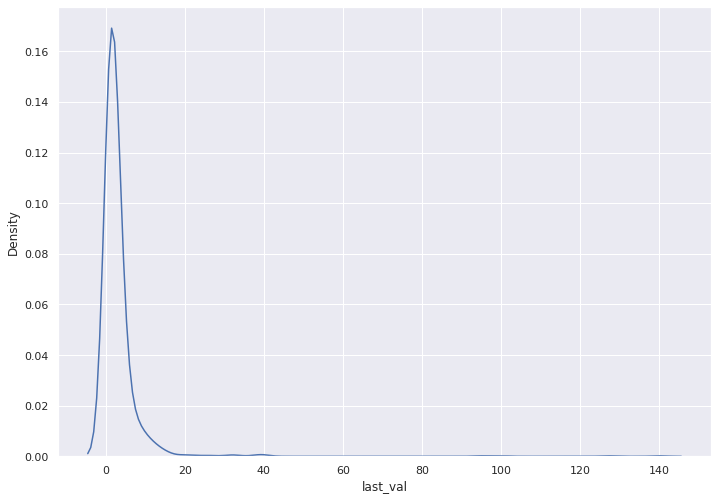

In [107]:
sns.kdeplot(df_start['last_val'])